Use this notebook to run experiments and plot results easily. You do not need to submit it, but you may use some of the generated plots in your report.

In [1]:
import numpy as np
import utils

In [2]:
data_folder = 'data/'

In [3]:
#1- Data loading
import pandas as pd
training_ds = pd.read_csv(data_folder + 'training.csv', sep=',')
training_ds.describe()

,X1,X2,y
count,2800.000000,2800.000000,2800.000000
mean,0.513191,0.530130,0.507857
std,1.110650,1.022037,0.500028
min,-2.849323,-2.479585,0.000000
25%,-0.263694,-0.191209,0.000000
50%,0.452791,0.445602,1.000000
75%,1.223723,1.195412,1.000000
max,5.043831,5.432484,1.000000


You can use the routine below to plot your results. Be careful to respect the naming conventions of the variables. This means X - training inputs, y - training labels, X_test - test inputs and y_test - predicted labels

In [4]:

X = training_ds[["X1", "X2"]].to_numpy()
y = training_ds["y"].to_numpy()

X[:,:][1:5], y[1:5]

(array([[ 0.44759256,  0.55980716],
        [ 0.74922924, -0.43377964],
        [-0.28928732,  1.53683223],
        [ 3.6750823 ,  2.14691204]]),
 array([1., 0., 1., 1.]))

In [5]:
# Create a grid of testing points
h=.02 # space in the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx is the x-axis coordinate of the points in the test set
# yy is the y-axis coordinate of the points in the test set
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_test contains the test set inputs (xx,yy)
X_test = np.c_[xx.ravel(), yy.ravel()]

In [6]:
y_test_k3 = X_test
k = 3

TypeError: Dimensions of C (245520, 2) should be one smaller than X(495) and Y(496) while using shading='flat' see help(pcolormesh)

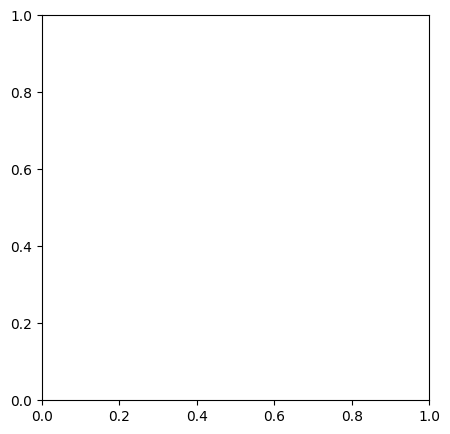

In [7]:
utils.plot_results(xx,yy, X, y, y_test_k3, "k=" + str(k))